open_time Kline Час відкриття в форматі unix time  
open_ Ціна відкриття  
high_ Висока ціна  
low_ Низька ціна  
close_ Ціна закриття  
volume_ Обсяг  
close_time_ Kline Час закриття у форматі unix time  
quote_volume Обсяг котирування Обсяг активу  
count_ Кількість угод  
taker_buy_volume Обсяг покупки базового активу за цей період  
taker_buy_quote_volume Обсяг купівлі котируваного активу за цей період  
ignore_ Ігнорувати  



Торгова пара: EUR-USDT (jan 2024 - feb 2024)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import ccxt
import pandas as pd
from datetime import datetime, timedelta
import plotly.graph_objs as go


# Task 1

In [6]:
columns = ["open_time", "open", "high", "low", "close", "volume", "close_time", "quote_volume", "count", "taker_buy_volume", "taker_buy_quote_volume", "ignore"]
raw_data = pd.read_csv("EURUSDT-5m-2024-01.csv", names = columns)

In [7]:
raw_data

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1704067200000,1.1002,1.1002,1.1000,1.1001,75502.0,1704067499999,83058.37934,114,57423.7,63172.09674,0
1,1704067500000,1.1000,1.1000,1.0997,1.0998,125403.7,1704067799999,137927.91418,168,56578.3,62225.32153,0
2,1704067800000,1.0997,1.0998,1.0997,1.0997,58003.2,1704068099999,63787.15582,86,10367.8,11402.50644,0
3,1704068100000,1.0997,1.0998,1.0997,1.0997,30231.3,1704068399999,33246.88873,74,15281.2,16806.26376,0
4,1704068400000,1.0997,1.0998,1.0997,1.0997,31446.4,1704068699999,34582.77919,92,11731.1,12901.86378,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8923,1706744100000,1.0810,1.0810,1.0809,1.0809,17907.9,1706744399999,19356.89726,86,2481.5,2682.50150,0
8924,1706744400000,1.0809,1.0810,1.0809,1.0810,16462.3,1706744699999,17794.55593,77,4558.6,4927.84660,0
8925,1706744700000,1.0810,1.0810,1.0809,1.0810,11101.6,1706744999999,12000.66055,43,9411.1,10173.39910,0
8926,1706745000000,1.0810,1.0810,1.0808,1.0809,46655.2,1706745299999,50430.92743,90,14431.6,15600.55960,0


In [8]:
raw_data['open_time'] = pd.to_datetime(raw_data['open_time'], unit = 'ms')
raw_data['close_time'] = pd.to_datetime(raw_data['close_time'], unit = 'ms')


In [9]:
raw_data

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,2024-01-01 00:00:00,1.1002,1.1002,1.1000,1.1001,75502.0,2024-01-01 00:04:59.999,83058.37934,114,57423.7,63172.09674,0
1,2024-01-01 00:05:00,1.1000,1.1000,1.0997,1.0998,125403.7,2024-01-01 00:09:59.999,137927.91418,168,56578.3,62225.32153,0
2,2024-01-01 00:10:00,1.0997,1.0998,1.0997,1.0997,58003.2,2024-01-01 00:14:59.999,63787.15582,86,10367.8,11402.50644,0
3,2024-01-01 00:15:00,1.0997,1.0998,1.0997,1.0997,30231.3,2024-01-01 00:19:59.999,33246.88873,74,15281.2,16806.26376,0
4,2024-01-01 00:20:00,1.0997,1.0998,1.0997,1.0997,31446.4,2024-01-01 00:24:59.999,34582.77919,92,11731.1,12901.86378,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8923,2024-01-31 23:35:00,1.0810,1.0810,1.0809,1.0809,17907.9,2024-01-31 23:39:59.999,19356.89726,86,2481.5,2682.50150,0
8924,2024-01-31 23:40:00,1.0809,1.0810,1.0809,1.0810,16462.3,2024-01-31 23:44:59.999,17794.55593,77,4558.6,4927.84660,0
8925,2024-01-31 23:45:00,1.0810,1.0810,1.0809,1.0810,11101.6,2024-01-31 23:49:59.999,12000.66055,43,9411.1,10173.39910,0
8926,2024-01-31 23:50:00,1.0810,1.0810,1.0808,1.0809,46655.2,2024-01-31 23:54:59.999,50430.92743,90,14431.6,15600.55960,0


In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   open_time               8928 non-null   datetime64[ns]
 1   open                    8928 non-null   float64       
 2   high                    8928 non-null   float64       
 3   low                     8928 non-null   float64       
 4   close                   8928 non-null   float64       
 5   volume                  8928 non-null   float64       
 6   close_time              8928 non-null   datetime64[ns]
 7   quote_volume            8928 non-null   float64       
 8   count                   8928 non-null   int64         
 9   taker_buy_volume        8928 non-null   float64       
 10  taker_buy_quote_volume  8928 non-null   float64       
 11  ignore                  8928 non-null   int64         
dtypes: datetime64[ns](2), float64(8), int64(2)
memor

# Task 2

In [11]:
def rsi(data, window):

    rsi_period = window
    df = data.copy()

    df['gain'] = (df['close'] - df['open']).apply(lambda x: x if x > 0 else 0)
    df['loss'] = (df['close'] - df['open']).apply(lambda x: -x if x < 0 else 0)

    df['ema_gain'] = df['gain'].ewm(span=rsi_period, min_periods=rsi_period).mean()
    df['ema_loss'] = df['loss'].ewm(span=rsi_period, min_periods=rsi_period).mean()

    df['rs'] = df['ema_gain'] / df['ema_loss']    

    RSI = 100 - (100 / (df['rs'] + 1))


    # RSI має nan, тому замінимо його на 0(не впевнений що так можна)
    RSI[0: rsi_period + 1] = 0
    return RSI

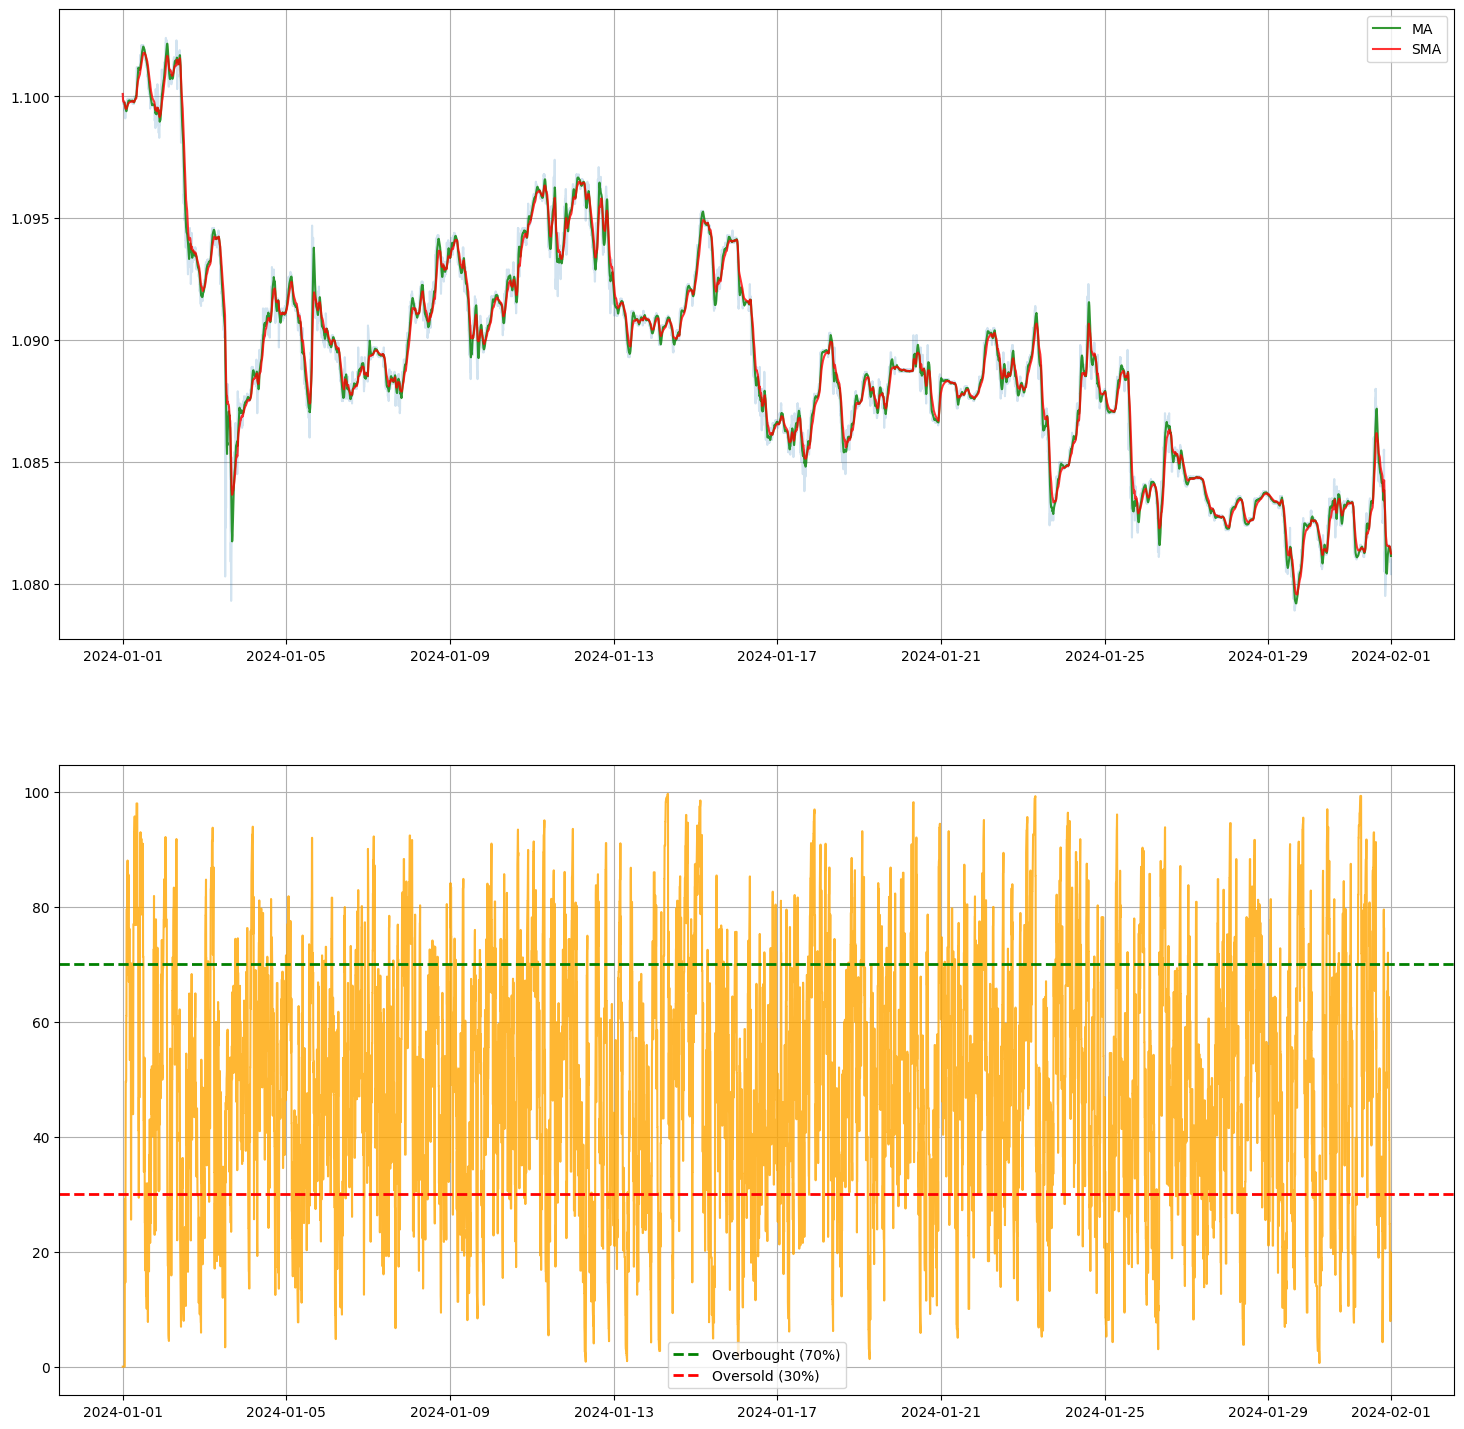

In [12]:
fig, ax = plt.subplots(2, 1, figsize = (18,18))

size_window = int(input("size of window: "))

# plot price(close) values
ax[0].plot(raw_data['open_time'], raw_data['close'], alpha = 0.2)
# Графік MA
ax[0].plot(raw_data['open_time'], raw_data['close'].rolling(size_window).mean(), c='green', alpha=0.8, label='MA')
# Графік SMA
ax[0].plot(raw_data['open_time'], raw_data['close'].ewm(size_window).mean(), c='red', alpha=0.8, label='SMA')
ax[0].grid(True)
ax[0].legend()

#RSI
ax1 = ax[1]
raw_data['RSI'] = rsi(raw_data, size_window)
ax1.plot(raw_data['open_time'], raw_data['RSI'], color='orange', alpha=0.8)
ax1.axhline(y=70, color='g', linestyle='--', linewidth=2, label='Overbought (70%)')
ax1.axhline(y=30, color='r', linestyle='--', linewidth=2, label='Oversold (30%)')
ax1.legend()
# Показ графіка
plt.grid(True)
plt.show()

# Task 3(I don't know why I don't delete it, but there are some really cool graphs there)

## Data

In [13]:
copytrader_1_trades = pd.read_csv('trades_3838699803249970688.csv')
copytrader_2_trades = pd.read_csv('trades_3871399360910422273.csv')
copytrader_1_positions = pd.read_csv('positions_3838699803249970688.csv')
copytrader_2_positions = pd.read_csv('positions_3871399360910422273.csv')


In [14]:
copytrader_1_trades.head()

,Unnamed: 0,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,0,1714060960000,DOGEUSDT,SELL,0.15192,-0.060768,USDT,303.84,USDT,1.954933,USDT,DOGE,2000.0,LONG,True
1,1,1714060918000,DOGEUSDT,SELL,0.15182,-0.060728,USDT,303.64,USDT,1.754933,USDT,DOGE,2000.0,LONG,True
2,2,1714060916000,DOGEUSDT,SELL,0.15172,-0.060688,USDT,303.44,USDT,1.554933,USDT,DOGE,2000.0,LONG,True
3,3,1714060301000,DOGEUSDT,SELL,0.15162,-0.060648,USDT,303.24,USDT,1.354933,USDT,DOGE,2000.0,LONG,True
4,4,1714060274000,DOGEUSDT,SELL,0.15152,-0.060608,USDT,303.04,USDT,1.154933,USDT,DOGE,2000.0,LONG,True


*У всіх даних є unnamed 1 колонка, яка по факту нам не потрібна, тому видалимо її*

## FE

In [15]:
copytrader_1_trades.drop('Unnamed: 0', axis=1, inplace=True)
copytrader_2_trades.drop('Unnamed: 0', axis=1, inplace=True)
copytrader_1_positions.drop('Unnamed: 0', axis=1, inplace=True)
copytrader_2_positions.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
copytrader_1_trades['time'] = pd.to_datetime(copytrader_1_trades['time'], unit = 'ms')
copytrader_2_trades['time'] = pd.to_datetime(copytrader_2_trades['time'], unit = 'ms')

copytrader_1_positions['opened'] = pd.to_datetime(copytrader_1_positions['opened'], unit = 'ms')
copytrader_2_positions['opened'] = pd.to_datetime(copytrader_2_positions['opened'], unit = 'ms')

copytrader_1_positions['closed'] = pd.to_datetime(copytrader_1_positions['closed'], unit = 'ms')
copytrader_2_positions['closed'] = pd.to_datetime(copytrader_2_positions['closed'], unit = 'ms')

copytrader_1_positions['updateTime'] = pd.to_datetime(copytrader_1_positions['updateTime'], unit = 'ms')
copytrader_2_positions['updateTime'] = pd.to_datetime(copytrader_2_positions['updateTime'], unit = 'ms')

In [17]:
copytrader_1_positions = copytrader_1_positions.sort_values('opened').reset_index(drop=True)
copytrader_2_positions = copytrader_2_positions.sort_values('opened').reset_index(drop=True)

In [18]:
copytrader_1_trades.head()

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,2024-04-25 16:02:40,DOGEUSDT,SELL,0.15192,-0.060768,USDT,303.84,USDT,1.954933,USDT,DOGE,2000.0,LONG,True
1,2024-04-25 16:01:58,DOGEUSDT,SELL,0.15182,-0.060728,USDT,303.64,USDT,1.754933,USDT,DOGE,2000.0,LONG,True
2,2024-04-25 16:01:56,DOGEUSDT,SELL,0.15172,-0.060688,USDT,303.44,USDT,1.554933,USDT,DOGE,2000.0,LONG,True
3,2024-04-25 15:51:41,DOGEUSDT,SELL,0.15162,-0.060648,USDT,303.24,USDT,1.354933,USDT,DOGE,2000.0,LONG,True
4,2024-04-25 15:51:14,DOGEUSDT,SELL,0.15152,-0.060608,USDT,303.04,USDT,1.154933,USDT,DOGE,2000.0,LONG,True


In [19]:
copytrader_1_positions.head()

,id,symbol,type,opened,closed,avgCost,avgClosePrice,closingPnl,maxOpenInterest,closedVolume,isolated,side,status,updateTime
0,1155605,DOGEUSDT,UM,2023-12-07 10:46:45.725,2023-12-07 11:13:41.356,0.094014,0.09442,0.609,1500.0,1500.0,Cross,Long,All Closed,2023-12-07 11:13:41.531
1,1159663,DOGEUSDT,UM,2023-12-07 11:32:58.280,2023-12-07 12:31:31.740,0.094376,0.09482,0.488,1100.0,1100.0,Cross,Long,All Closed,2023-12-07 12:31:31.846
2,1164109,DOGEUSDT,UM,2023-12-07 13:49:47.503,2023-12-07 14:11:19.285,0.094260,0.09462,0.180,500.0,500.0,Cross,Long,All Closed,2023-12-07 14:11:19.433
3,1164561,DOGEUSDT,UM,2023-12-07 14:21:20.205,2023-12-07 14:26:36.467,0.094310,0.09472,0.205,500.0,500.0,Cross,Long,All Closed,2023-12-07 14:26:36.617
4,1171655,DOGEUSDT,UM,2023-12-07 15:26:21.183,2023-12-07 16:01:23.559,0.096497,0.09608,0.501,1200.0,1200.0,Cross,Short,All Closed,2023-12-07 16:01:24.135


In [20]:
total_balace_on_account = 4000

## First bot

In [21]:
incomes = copytrader_1_positions.closingPnl/total_balace_on_account*100

In [22]:
iterest_rate = 0
sharp_ratio = (incomes.mean() - iterest_rate)/incomes.std()
print('sharp ratio', round(sharp_ratio, 2))

print(f'win rates {round((incomes > 0).sum()/len(incomes) *100, 2)}%')
print(f'total profit {round(incomes.sum(), 3)}%')

sharp ratio 0.02
win rates 99.84%
total profit 23.296%


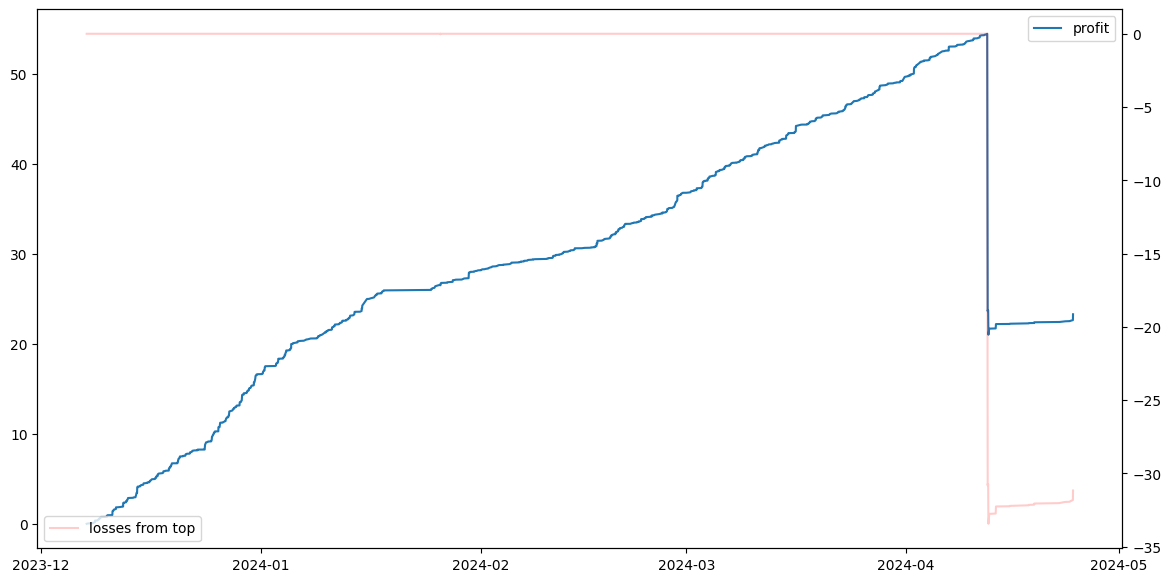

In [23]:
fig, ax = plt.subplots(figsize = (14,7))

#income profit
ax.plot(copytrader_1_positions['opened'], incomes.cumsum())

#draw down
ax2 = ax.twinx()
ax2.plot(copytrader_1_positions['opened'], incomes.cumsum() - pd.Series(incomes.cumsum()).cummax(), c = 'red', alpha = 0.2)

ax.legend(['profit'])
ax2.legend(['losses from top'])

## Second bot

### searching anomalies

In [24]:
copytrader_2_trades

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,2024-04-25 15:51:05,MATICUSDT,BUY,0.71720,-0.009610,USDT,48.05240,USDT,0.000000,USDT,MATIC,67.0,LONG,False
1,2024-04-25 15:50:50,MATICUSDT,SELL,0.71710,-0.061384,USDT,306.91880,USDT,3.067935,USDT,MATIC,428.0,LONG,True
2,2024-04-25 15:43:06,MATICUSDT,SELL,0.71660,-0.061054,USDT,305.27160,USDT,2.840599,USDT,MATIC,426.0,LONG,True
3,2024-04-25 15:38:09,MATICUSDT,SELL,0.71620,-0.061163,USDT,305.81740,USDT,2.676467,USDT,MATIC,427.0,LONG,True
4,2024-04-25 15:37:13,MATICUSDT,SELL,0.71580,-0.013457,USDT,67.28520,USDT,0.551599,USDT,MATIC,94.0,LONG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595,2024-02-28 03:21:53,MATICUSDT,SELL,1.02560,-0.001026,USDT,5.12800,USDT,0.000000,USDT,MATIC,5.0,SHORT,True
5596,2024-02-28 03:16:06,MATICUSDT,BUY,1.02220,-0.001022,USDT,5.11100,USDT,0.047500,USDT,MATIC,5.0,SHORT,False
5597,2024-02-28 02:00:48,DOGEUSDT,BUY,0.09609,-0.013549,USDT,67.74345,USDT,0.000000,USDT,DOGE,705.0,LONG,False
5598,2024-02-27 23:41:59,DOGEUSDT,BUY,0.09823,-0.005363,USDT,26.81679,USDT,0.000000,USDT,DOGE,273.0,LONG,False


In [25]:
copytrader_2_trades.isna().sum()

time                   0
symbol                 0
side                   0
price                  0
fee                    0
feeAsset               0
quantity               0
quantityAsset          0
realizedProfit         0
realizedProfitAsset    0
baseAsset              0
qty                    0
positionSide           0
activeBuy              0
dtype: int64

In [26]:
copytrader_2_positions.isna().sum()

id                 0
symbol             0
type               0
opened             0
closed             0
avgCost            0
avgClosePrice      0
closingPnl         0
maxOpenInterest    0
closedVolume       0
isolated           0
side               0
status             0
updateTime         0
dtype: int64

In [27]:
copytrader_2_positions

,id,symbol,type,opened,closed,avgCost,avgClosePrice,closingPnl,maxOpenInterest,closedVolume,isolated,side,status,updateTime
0,5778622,1000SHIBUSDT,UM,2024-01-08 17:57:11.230,2024-01-08 18:01:15.036,0.009276,0.009345,0.120612,1748.0,1748.0,Cross,Long,All Closed,2024-01-08 18:01:15.185
1,5780298,1000SHIBUSDT,UM,2024-01-08 18:02:18.814,2024-01-08 18:23:25.200,0.009318,0.009388,0.121870,1741.0,1741.0,Cross,Long,All Closed,2024-01-08 18:23:25.375
2,5784298,1000SHIBUSDT,UM,2024-01-08 18:24:18.278,2024-01-08 18:38:46.736,0.009408,0.009478,0.120680,1724.0,1724.0,Cross,Long,All Closed,2024-01-08 18:38:46.887
3,5788014,1000SHIBUSDT,UM,2024-01-08 18:39:11.663,2024-01-08 19:34:04.275,0.009468,0.009539,0.121623,1713.0,1713.0,Cross,Long,All Closed,2024-01-08 19:34:04.480
4,5797669,1000SHIBUSDT,UM,2024-01-08 19:35:18.313,2024-01-09 04:45:36.851,0.009425,0.009496,0.405878,5723.0,5723.0,Cross,Long,All Closed,2024-01-09 14:20:41.198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,32227996,DOGEUSDT,UM,2024-04-25 07:35:19.932,2024-04-25 11:10:42.023,0.148486,0.149150,0.547520,824.0,824.0,Cross,Long,All Closed,2024-04-25 11:10:42.192
2446,32254273,DOGEUSDT,UM,2024-04-25 11:13:38.318,2024-04-25 11:18:07.112,0.148780,0.149450,0.156110,233.0,233.0,Cross,Long,All Closed,2024-04-25 11:18:07.607
2447,32267701,DOGEUSDT,UM,2024-04-25 12:41:23.128,2024-04-25 14:07:34.504,0.149470,0.150140,0.155440,232.0,232.0,Cross,Long,All Closed,2024-04-25 14:07:34.810
2448,32291678,DOGEUSDT,UM,2024-04-25 14:53:32.671,2024-04-25 15:02:11.843,0.149330,0.150000,0.156110,233.0,233.0,Cross,Long,All Closed,2024-04-25 15:02:12.051


In [28]:
def clear_PnL(data):
    market_order_per = 0.022 / 100
    limit_order_per = 0.004 / 100
    data['clearPnl'] = data['closingPnl'] - data['closingPnl'] * market_order_per - data['closingPnl'] * limit_order_per
    return data['clearPnl']

copytrader_2_positions['clearPnl'] = clear_PnL(copytrader_2_positions)

In [29]:
copytrader_2_trades[:-1]

,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy
0,2024-04-25 15:51:05,MATICUSDT,BUY,0.71720,-0.009610,USDT,48.05240,USDT,0.000000,USDT,MATIC,67.0,LONG,False
1,2024-04-25 15:50:50,MATICUSDT,SELL,0.71710,-0.061384,USDT,306.91880,USDT,3.067935,USDT,MATIC,428.0,LONG,True
2,2024-04-25 15:43:06,MATICUSDT,SELL,0.71660,-0.061054,USDT,305.27160,USDT,2.840599,USDT,MATIC,426.0,LONG,True
3,2024-04-25 15:38:09,MATICUSDT,SELL,0.71620,-0.061163,USDT,305.81740,USDT,2.676467,USDT,MATIC,427.0,LONG,True
4,2024-04-25 15:37:13,MATICUSDT,SELL,0.71580,-0.013457,USDT,67.28520,USDT,0.551599,USDT,MATIC,94.0,LONG,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,2024-02-28 03:57:22,DOGEUSDT,BUY,0.09446,-0.047740,USDT,238.70042,USDT,0.000000,USDT,DOGE,2527.0,LONG,False
5595,2024-02-28 03:21:53,MATICUSDT,SELL,1.02560,-0.001026,USDT,5.12800,USDT,0.000000,USDT,MATIC,5.0,SHORT,True
5596,2024-02-28 03:16:06,MATICUSDT,BUY,1.02220,-0.001022,USDT,5.11100,USDT,0.047500,USDT,MATIC,5.0,SHORT,False
5597,2024-02-28 02:00:48,DOGEUSDT,BUY,0.09609,-0.013549,USDT,67.74345,USDT,0.000000,USDT,DOGE,705.0,LONG,False


In [30]:
copytrader_2_trades['symbol'].unique()

array(['MATICUSDT', 'DOGEUSDT', 'ATOMUSDT', '1000SHIBUSDT', 'THETAUSDT'],
      dtype=object)

In [32]:
copytrader_2_positions['closingPnl'].describe()

count    2450.000000
mean        0.289022
std        15.644632
min      -752.659700
25%         0.129280
50%         0.174735
75%         0.280743
max       135.578720
Name: closingPnl, dtype: float64

Є ідея проаналізувати кожну торгову пару, поставити на графік помітки, коли була купівля\продаж монети і тим самим спробувати зрозуміти стратегію бота

## Analyse for second bot

### func

In [33]:
def data_dow(symbol, timeframe, start_date, end_date):
    exchange = ccxt.binance()
    since = exchange.parse8601(start_date.strftime('%Y-%m-%dT%H:%M:%S'))
    until = exchange.parse8601(end_date.strftime('%Y-%m-%dT%H:%M:%S'))
    all_ohlcv = []

    while since < until:
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
        if not ohlcv:
            break
        all_ohlcv.extend(ohlcv)
        since = ohlcv[-1][0] + 1  # Оновлюємо since на наступний після останнього отриманого запису

    df = pd.DataFrame(all_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    return df


In [34]:
def long_short(data, cur_pair):
    data = data[data['symbol'] == cur_pair]
    data_long = data[data['side'] == 'Long']
    data_short = data[data['side'] == 'Short']

    return [data_long, data_short]

In [65]:
def price_graph(data, bot_long, bot_short):
    candlestick = go.Candlestick(
                            x=data['timestamp'],
                            open=data['open'],
                            high=data['high'],
                            low=data['low'],
                            close=data['close'])
    
    bot_positions_long = go.Scatter(x=bot_long['opened'], y=bot_long['avgCost'], mode='markers', name='Bot Positions', marker_color = 'blue')
    bot_positions_short = go.Scatter(x=bot_short['opened'], y=bot_short['avgCost'], mode='markers', name='Bot Positions', marker_color = 'yellow')
    
    bot_positions_long_c = go.Scatter(x=bot_long['closed'], y=bot_long['avgCost'], mode='markers', name='Bot Positions', marker_color = 'purple')
    bot_positions_short_c = go.Scatter(x=bot_short['closed'], y=bot_short['avgCost'], mode='markers', name='Bot Positions', marker_color = 'black')

    fig = go.Figure(data=[candlestick, bot_positions_long, bot_positions_short, bot_positions_long_c, bot_positions_short_c])
    
    fig.update_layout(
        width=2400,
        height=800,  
    )
    fig.show()

# Кольори точок: 
#   blue - відкрита позиція на лонг
#   purple - закрита позиція на лонг
#   yellow - відкрита позиція на шорт
#   black - закрита позиція на шорт

In [36]:
copytrader_2_trades['symbol'].unique()

array(['MATICUSDT', 'DOGEUSDT', 'ATOMUSDT', '1000SHIBUSDT', 'THETAUSDT'],
      dtype=object)

### MaticUSDT

In [37]:
matic_bot_long, matic_bot_short = long_short(copytrader_2_positions, 'MATICUSDT')[0], long_short(copytrader_2_positions, 'MATICUSDT')[1]

In [38]:
symbol = 'MATIC/USDT'
timeframe = '1h'  # Годинні свічки
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 5, 1)

df = data_dow(symbol, timeframe, start_date, end_date)

In [39]:
price_graph(df, matic_bot_long, matic_bot_short)

*Є ідея, що дуже багато позицій було закрито через стоп-лосс, подивимось чи це правда*

### DogeUSDT

In [40]:
doge_bot_long, doge_bot_short = long_short(copytrader_2_positions, 'DOGEUSDT')[0], long_short(copytrader_2_positions, 'DOGEUSDT')[1]

In [41]:
symbol = 'DOGE/USDT'
timeframe = '1h'  # Годинні свічки
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 5, 1)

df = data_dow(symbol, timeframe, start_date, end_date)

In [42]:
price_graph(df, doge_bot_long, doge_bot_short)

### ATOMUSDT

In [43]:
atom_bot_long, atom_bot_short = long_short(copytrader_2_positions, 'ATOMUSDT')[0], long_short(copytrader_2_positions, 'ATOMUSDT')[1]

In [44]:
symbol = 'ATOM/USDT'
timeframe = '1h'  # Годинні свічки
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 5, 1)

df = data_dow(symbol, timeframe, start_date, end_date)

In [45]:
price_graph(df, atom_bot_long, atom_bot_short)

### 1000SHIBUSDT

In [46]:
shib_bot_long, shib_bot_short = long_short(copytrader_2_positions, '1000SHIBUSDT')[0], long_short(copytrader_2_positions, '1000SHIBUSDT')[1]

In [47]:
symbol = '1000SHIB/USDT'
timeframe = '1h'  # Годинні свічки
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 5, 1)

df = data_dow(symbol, timeframe, start_date, end_date)

In [48]:
price_graph(df, shib_bot_long, shib_bot_short)